<a href="https://colab.research.google.com/github/deokgyuhan/Clothing-Segmentation/blob/master/TryYours_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TryYours - High Resolution Virtual Try On site using HR-VITON.
---
Demo for Virtual Try On website

# 1.Setup
- First, in the **Runtime** menu -> **Change runtime type**, make sure to have ```Hardware Accelerator = GPU```
- Clone repo and install dependencies.
- **It will take few minutes to finish installation**

In [1]:
# clone repository
!git clone https://github.com/lastdefiance20/TryYours-Virtual-Try-On

# install dependencies
!pip install tensorboardX av torchgeometry flask flask-ngrok iglovikov_helper_functions cloths_segmentation albumentations
!pip install scipy==1.8.0

%cd TryYours-Virtual-Try-On
# install detectron2
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Cloning into 'TryYours-Virtual-Try-On'...
remote: Enumerating objects: 1113, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 1113 (delta 4), reused 11 (delta 3), pack-reused 1100
Receiving objects: 100% (1113/1113), 22.21 MiB | 45.57 MiB/s, done.
Resolving deltas: 100% (198/198), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 86.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 kB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# 2. Download Pre-trained Models

In [2]:
!pip install --upgrade --no-cache-dir gdown

%cd HR-VITON-main
!gdown https://drive.google.com/u/0/uc?id=1T5_YDUhYSSKPC_nZMk2NeC-XXUFoYeNy&export=download
!gdown https://drive.google.com/u/0/uc?id=1XJTCdRBOPVgVTmqzhVGFAgMm2NLkw5uQ&export=download
%cd ../

%cd Graphonomy-master
!gdown https://drive.google.com/u/0/uc?id=1eUe18HoH05p0yFUd_sN6GXdTj82aW0m9&export=download
%cd ../

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
/content/TryYours-Virtual-Try-On/HR-VITON-main
Downloading...
From (uriginal): https://drive.google.com/u/0/uc?id=1T5_YDUhYSSKPC_nZMk2NeC-XXUFoYeNy
From (redirected): https://drive.google.com/uc?id=1T5_YDUhYSSKPC_nZMk2NeC-XXUFoYeNy&confirm=t&uuid=a100e221-c324-40de-afbc-8c1a6a485ac4
To: /content/TryYours-Virtual-Try-On/HR-VITON-main/gen.pth
100% 402M/402M [00:03<00:00, 118MB/s]
Downloading...
From (uriginal): https://drive.google.com/u/0/uc?id=1XJTCdRBOPVgVTmqzhVGFAgMm2NLkw5uQ
From (redirected): https://drive.google.com/uc?id=1XJTCdRBOPVgVTmqzhVGFAgMm2NLkw5uQ&confirm=t&uuid=f85f897d-d737-4015-b872-e9cabaa8b467
To: /content/TryYours-Virtual-Try-On/HR-VITON-main/mtviton.pth
100% 190M/190M [00:05<00:00, 37.5MB/s]
/content/TryYours-Virtual-Try-On
/content/TryYours-Virtual-Try-On/Graphonomy-master
Downloading...
From (uriginal): https://drive.go

# 3. Upload Cloth Images
Either use sample images or upload other cloth images

In [3]:
import os
import shutil
from google.colab import files

# Uncomment the following block if you would like to upload your own cloth images.
'''
input_dir = 'static'
uploaded = files.upload()
for filename in uploaded.keys():
  input_path = os.path.join(input_dir, filename)
  shutil.move(filename, input_path)
os.remove(input_dir+'/cloth_web.jpg')
os.rename(input_path, input_dir+'/cloth_web.jpg')
'''

"\ninput_dir = 'static'\nuploaded = files.upload()\nfor filename in uploaded.keys():\n  input_path = os.path.join(input_dir, filename)\n  shutil.move(filename, input_path)\nos.remove(input_dir+'/cloth_web.jpg')\nos.rename(input_path, input_dir+'/cloth_web.jpg')\n"

# 4. Upload Person Images
Either use sample images or upload your images

In [4]:
# Uncomment the following block if you would like to upload your own images.
'''
input_dir = 'static'
uploaded = files.upload()
for filename in uploaded.keys():
  input_path = os.path.join(input_dir, filename)
  shutil.move(filename, input_path)
os.remove(input_dir+'/origin_web.jpg')
os.rename(input_path, input_dir+'/origin_web.jpg')
'''

"\ninput_dir = 'static'\nuploaded = files.upload()\nfor filename in uploaded.keys():\n  input_path = os.path.join(input_dir, filename)\n  shutil.move(filename, input_path)\nos.remove(input_dir+'/origin_web.jpg')\nos.rename(input_path, input_dir+'/origin_web.jpg')\n"

# 5. Check Images
check image uploaded successfully

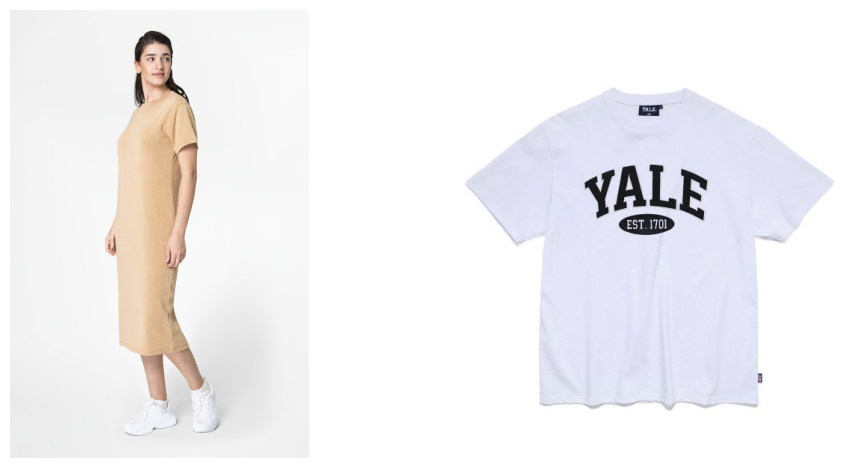

In [13]:
import matplotlib.pyplot as plt
import cv2

original = cv2.cvtColor(cv2.imread("./static/origin_web.jpg"), cv2.COLOR_BGR2RGB)
cloth = cv2.cvtColor(cv2.imread("./static/cloth_web.jpg"), cv2.COLOR_BGR2RGB)
## Display Images
fig, axes = plt.subplots(nrows=1, ncols=2)
dpi = fig.get_dpi()
fig.set_size_inches(900/ dpi, 448 / dpi)
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
axes[0].axis('off')
axes[0].imshow(original)
axes[1].axis('off')
axes[1].imshow(cloth)
plt.show()

# 6. RUN CODE
* It will take less than 2 minute
* you can remove background using --background False




In [14]:
# python exp/inference/inference.py --loadmodel inference.pth --img_path ./img/messi.jpg --output_path ./img/ --output_name /output_file_name
!python main.py #--background False

Get mask of cloth

Get openpose coordinate using posenet

Generate semantic segmentation using Graphonomy-Master library

Constructing DeepLabv3+ model...
Number of classes: 20
Output stride: 16
Number of Input Channels: 3
load model: ./inference.pth
time used for the multi-scale image inference is :2.4719195960001343

Generate Densepose image using detectron2 library

[11/12 12:29:48 apply_net]: Loading config from detectron2/projects/DensePose/configs/densepose_rcnn_R_50_FPN_s1x.yaml
[11/12 12:29:48 apply_net]: Loading model from https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl
[11/12 12:29:49 apply_net]: Loading data from origin.jpg
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-

# 7. View Results

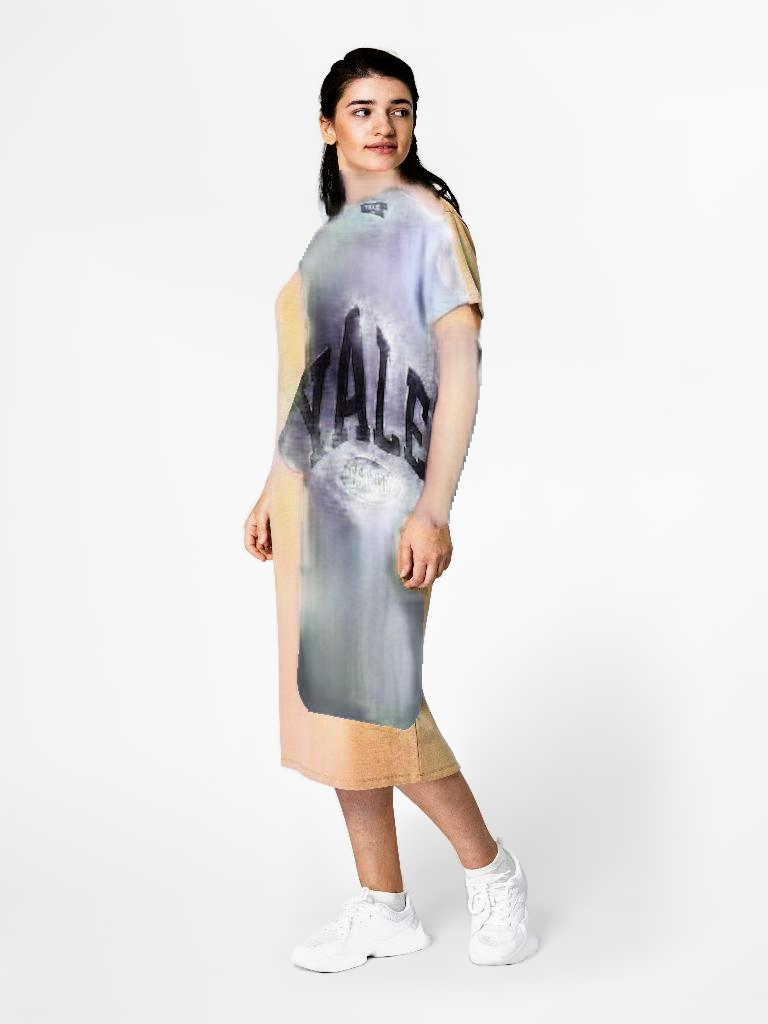

In [15]:
from PIL import Image
from IPython.display import Image

image1 = Image(filename="./static/finalimg.png")
display(image1)

# We will add Website code later. Enjoy the code!